# Some imports and helper code

In [196]:
import pickle
import seaborn
import numpy as np
import pandas as pd
import scipy as sci
import networkx as nx
import matplotlib.pylab as plt
from threat_model import Threat_Model
np.random.seed(1)

%matplotlib inline 

plt.style.use('seaborn-paper')
seaborn.set_context('paper', font_scale=2.2)
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.weight'] = 'medium'

In [2]:
def plot_results(results, alphas):
    plt.figure()
    results[['lambda', 'lambda_sub', 'centrality']].plot(kind='line')
    plt.xlabel('iterations')
    title_template = r'$\alpha_1={:.2f}, \alpha_2={:.2f}, \alpha_3={:.2f}$'
    plt.title(title_template.format(*alphas))
    
    
def plot_adj_matrices(graph, final_adj):
    _, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(nx.to_numpy_array(graph))
    axes[0].set_title('before attack')
    axes[1].imshow(final_adj.A)
    axes[1].set_title('after attack')

In [292]:
graph_type = 'BA'
with open('../result/{}_numExp_100.p'.format(graph_type), 'rb') as fid:
    data = pickle.load(fid)
# data_f = pd.DataFrame(data, columns=['lambda1_S', 'centrality', 'utility', 'budget'], dtype=np.float32)
data_f = pd.DataFrame(data, columns=['lambda1_S', 'centrality', 'utility', 'S_size', \
                                     'Avg. Degree', 'G_size', 'budget'], dtype=np.float32)

/Users/yusixie/miniconda2/envs/attack-graph/lib/python3.7/site-packages/matplotlib/backends/backend_pdf.py:946: RuntimeWarning: Glyph 0 missing from current font.
  s, flags=LOAD_NO_SCALE | LOAD_NO_HINTING).horiAdvance
/Users/yusixie/miniconda2/envs/attack-graph/lib/python3.7/site-packages/matplotlib/backends/backend_pdf.py:946: RuntimeWarning: Glyph 1 missing from current font.
  s, flags=LOAD_NO_SCALE | LOAD_NO_HINTING).horiAdvance
/Users/yusixie/miniconda2/envs/attack-graph/lib/python3.7/site-packages/matplotlib/backends/backend_pdf.py:946: RuntimeWarning: Glyph 2 missing from current font.
  s, flags=LOAD_NO_SCALE | LOAD_NO_HINTING).horiAdvance
/Users/yusixie/miniconda2/envs/attack-graph/lib/python3.7/site-packages/matplotlib/backends/backend_pdf.py:946: RuntimeWarning: Glyph 3 missing from current font.
  s, flags=LOAD_NO_SCALE | LOAD_NO_HINTING).horiAdvance
/Users/yusixie/miniconda2/envs/attack-graph/lib/python3.7/site-packages/matplotlib/backends/backend_pdf.py:946: RuntimeWarni

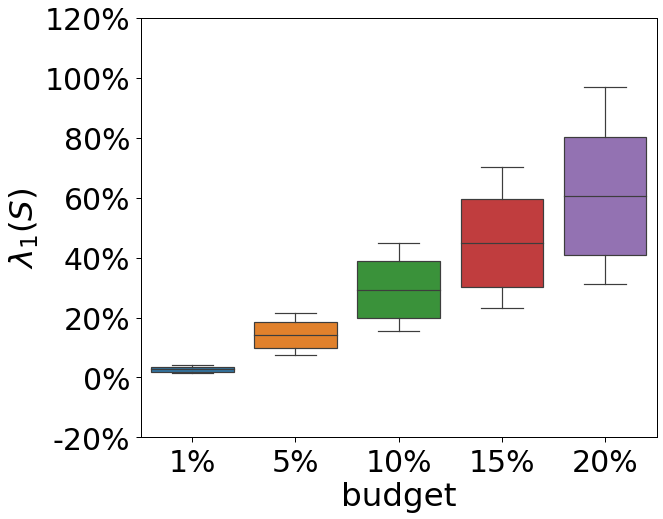

In [300]:
seaborn.set_context('paper', font_scale=3.4)
plt.subplots(figsize=(10, 8))
ax = seaborn.boxplot(x='budget', y='lambda1_S', data=data_f, orient='v', showfliers=False)
plt.xticks(range(5), ['1%', '5%', '10%', '15%', '20%'])
plt.yticks(ax.get_yticks(),  ['%.0f%%' % (i*100) for i in ax.get_yticks()])
plt.ylabel('$\lambda_1(S)$')
plt.xlabel('budget')
plt.tight_layout()
# plt.title("% of increases $\lambda_1(S)$ - {}".format(graph_type))
plt.savefig('../result/figure/{}_lambda1S_numExp_100.pdf'.format(graph_type))

/Users/yusixie/miniconda2/envs/attack-graph/lib/python3.7/site-packages/matplotlib/backends/backend_pdf.py:946: RuntimeWarning: Glyph 0 missing from current font.
  s, flags=LOAD_NO_SCALE | LOAD_NO_HINTING).horiAdvance
/Users/yusixie/miniconda2/envs/attack-graph/lib/python3.7/site-packages/matplotlib/backends/backend_pdf.py:946: RuntimeWarning: Glyph 1 missing from current font.
  s, flags=LOAD_NO_SCALE | LOAD_NO_HINTING).horiAdvance
/Users/yusixie/miniconda2/envs/attack-graph/lib/python3.7/site-packages/matplotlib/backends/backend_pdf.py:946: RuntimeWarning: Glyph 2 missing from current font.
  s, flags=LOAD_NO_SCALE | LOAD_NO_HINTING).horiAdvance
/Users/yusixie/miniconda2/envs/attack-graph/lib/python3.7/site-packages/matplotlib/backends/backend_pdf.py:946: RuntimeWarning: Glyph 3 missing from current font.
  s, flags=LOAD_NO_SCALE | LOAD_NO_HINTING).horiAdvance
/Users/yusixie/miniconda2/envs/attack-graph/lib/python3.7/site-packages/matplotlib/backends/backend_pdf.py:946: RuntimeWarni

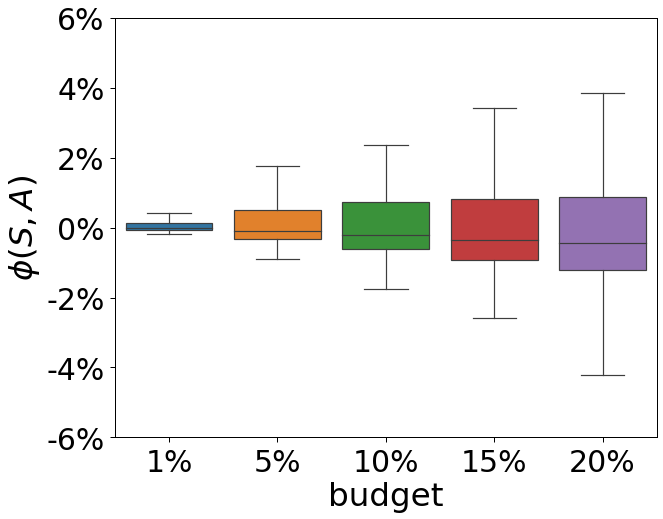

In [301]:
seaborn.set_context('paper', font_scale=3.4)
plt.subplots(figsize=(10, 8))
ax = seaborn.boxplot(x='budget', y='centrality', data=data_f, orient='v', showfliers=False)
plt.xticks(range(5), ['1%', '5%', '10%', '15%', '20%'])
plt.yticks(ax.get_yticks(),  ['%.0f%%' % (i*100) for i in ax.get_yticks()])
plt.ylabel('$\phi(S, A)$')
plt.tight_layout()
# plt.title("% of increases cut(S) - {}".format(graph_type))
plt.savefig('../result/figure/{}_cut_numExp_100.pdf'.format(graph_type))

In [296]:
sci.stats.pearsonr(data_f['centrality'], data_f['Avg. Degree'])

(-0.599976897691899, 3.2880583316904446e-50)

In [297]:
data_f[data_f.lambda1_S < 0]

,lambda1_S,centrality,utility,S_size,Avg. Degree,G_size,budget


In [298]:
data_f[data_f.centrality < 0]

,lambda1_S,centrality,utility,S_size,Avg. Degree,G_size,budget
0,0.023422,-0.000825,0.403088,38.0,5.631579,375.0,0.01
5,0.022604,-0.000773,0.369305,32.0,5.562500,375.0,0.01
6,0.017407,-0.000228,0.461488,59.0,6.355932,375.0,0.01
7,0.016742,-0.000647,0.524107,54.0,6.944445,375.0,0.01
8,0.017993,-0.001088,0.552898,48.0,6.937500,375.0,0.01
...,...,...,...,...,...,...,...
492,0.610457,-0.010465,0.489980,29.0,5.172414,375.0,0.20
494,0.472607,-0.004121,0.557353,50.0,5.920000,375.0,0.20
497,0.800296,-0.007482,0.445670,16.0,5.250000,375.0,0.20
498,0.481232,-0.010630,0.548254,40.0,5.750000,375.0,0.20


In [224]:
data_f[data_f.lambda1_S < 0][['S_size', 'Avg. Degree']].mean()

S_size         3.000000
Avg. Degree    1.944445
dtype: float32

In [225]:
data_f[data_f.lambda1_S >= 0][['S_size', 'Avg. Degree']].mean()

S_size         66.872337
Avg. Degree     6.911168
dtype: float32

In [226]:
sci.stats.ttest_ind(data_f[data_f.lambda1_S < 0]['Avg. Degree'], data_f[data_f.lambda1_S >= 0]['Avg. Degree'])

Ttest_indResult(statistic=-7.204311264800589, pvalue=6.978838116882321e-12)

In [227]:
sci.stats.ttest_ind(data_f[data_f.lambda1_S < 0]['S_size'], data_f[data_f.lambda1_S >= 0]['S_size'])

Ttest_indResult(statistic=-8.641977324429579, pvalue=6.920009922266447e-16)